#**The Sparks Foundation - GRIP June 2021**

##**Task 1**: Prediction using Supervised ML

####**Level**: Beginner

##**Author**: [**Aishwarya Muttineni**](https://www.linkedin.com/in/aishwarya-muttineni-047b5a200/)

###**Problem Statement**

• Predict the percentage of an student based on the no. of study hours.

• This is a simple linear regression task as it involves just 2 variables.

• What will be predicted score if a student studies for 9.25 hrs/ day?

###**Work Flow**

1) Data collection

2) Data Pre-processing

3) Data preparation

4) Train – Test data

5) Linear Regression Model

6) Training Linear Regression Model

7) Making Prediction

8) Model Evaluation

**Importing Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data collection and Pre-processing**

In [2]:
# loading dataset into pandas dataframe
data = pd.read_csv("http://bit.ly/w-data")
print("Data set collected successfully")

Data set collected successfully


In [3]:
# check first 10 attributes
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploratory data analysis**

In [4]:
# getting the shape of data set
data.shape

(25, 2)

In [5]:
# getting the attributes
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# getting the datatypes 
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
# getting the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# getting the statistical values 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [9]:
# checking the null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# checkin the duplicate values if any
data.duplicated().sum()

0

**Data Visualization**

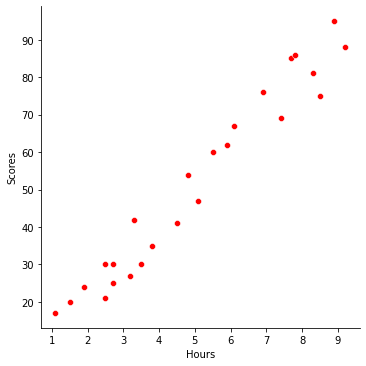

In [11]:
# line plot
sns.relplot(data = data, x = 'Hours', y = 'Scores', color = 'red')

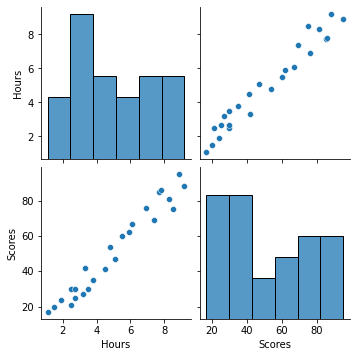

In [12]:
# pair plot
sns.pairplot(data , )

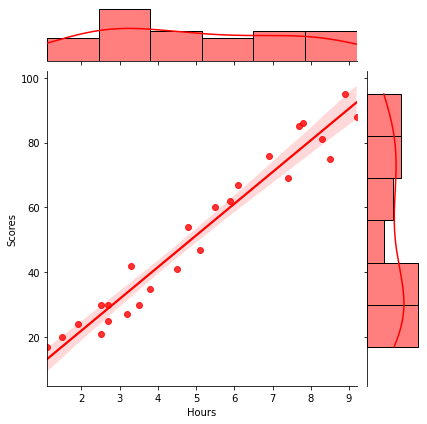

In [13]:
# joint plot
sns.jointplot(data = data, x = 'Hours', y = 'Scores', kind = 'reg', color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


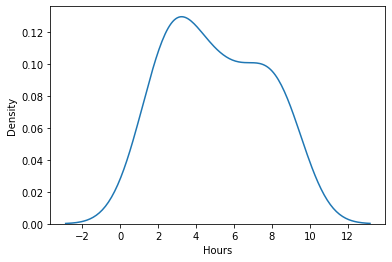

In [14]:
# histogram
sns.distplot(data['Hours'], bins = 10, kde = True , hist = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


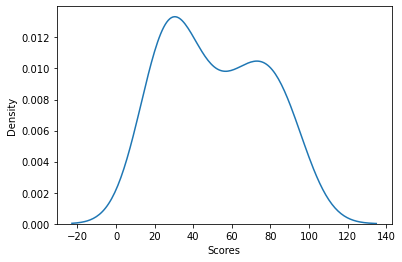

In [15]:
# histogram 
sns.distplot(data['Scores'], bins = 10, kde = True, hist = False)

From the above graphs we can see that there is a positive linear relationship between the Hours of study and Mark scores.

**Data Preperation**

In [16]:
#Divide the dataset into "attributes" (inputs) and "labels" (outputs).
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


print('Data prepared Successfully')

Data prepared Successfully


**Train - Test Split**

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

**Model Training**

In [18]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression() 
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# intercept
print("Intercept : ",linreg.intercept_)

Intercept :  1.5079104828268939


In [20]:
# coefficient
print("Coefficient : ",linreg.coef_)

Coefficient :  [9.94061514]


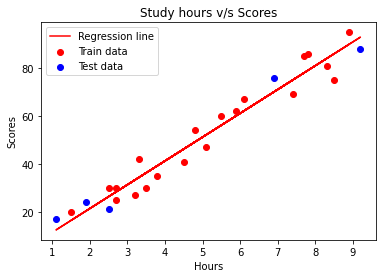

In [21]:
# plotting the regression line
line = linreg.coef_*x+linreg.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train, label = "Train data", color = 'red')
plt.scatter(x_test, y_test, label = "Test data", color = 'blue')
plt.title("Study hours v/s Scores")
plt.plot(x, line, color = 'red', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Making the prediction**

In [22]:
# predicting the score of sutudents
y_pred = linreg.predict(x_test)
print(y_pred)

[12.44258714 26.35944834 20.39507925 92.9615698  70.09815497]


In [23]:
print(x_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Varience':y_test-y_pred})  
df

,Actual,Predicted,Varience
0,17,12.442587,4.557413
1,21,26.359448,-5.359448
2,24,20.395079,3.604921
3,88,92.961570,-4.961570
4,76,70.098155,5.901845


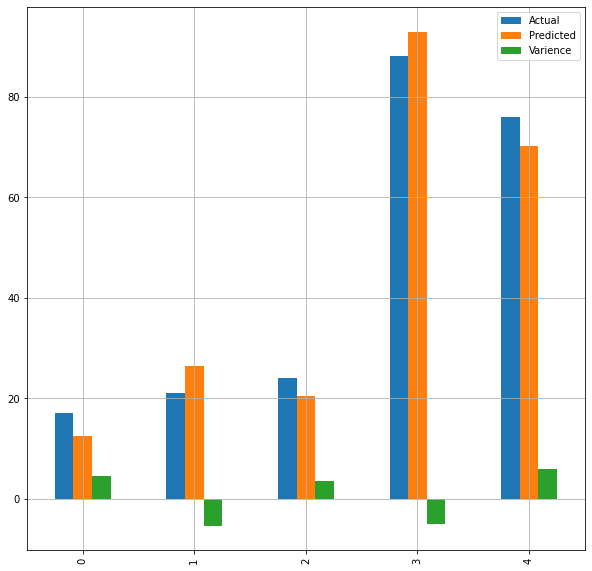

In [25]:
# plotting actual v/s predicted
df.plot(kind = 'bar', figsize = (10,10))
plt.grid()
plt.show()

In [26]:
# testing accuracy and training accuracy
print("Training Accuracy :",linreg.score(x_train,y_train))
print("Testing Accuracy :",linreg.score(x_test,y_test))

Training Accuracy : 0.9423348138802985
Testing Accuracy : 0.9735538080811826


**Making a predictive model**

Our aim is to predict the score, if the student studies for 9.25 hrs/day through the model.

In [27]:
Hours = 9.25
model_prediction = linreg.predict([[Hours]])
print("No. of Study Hours = {}".format(Hours))
print("Predicted Score = {}".format(model_prediction[0]))

No. of Study Hours = 9.25
Predicted Score = 93.45860055685799


**Model evaluation**

In [28]:
# r2_score
from sklearn.metrics import r2_score
r2score = round(r2_score(y_pred, y_test)*100,3)
print("The r2 score : ",r2score)

The r2 score :  97.532


In [29]:
from sklearn import metrics
print("Absolute Error of the Test data of Linear regression : ",metrics.mean_absolute_error(y_pred, y_test))
print("Mean Squared Error of Test data of Linear regression : ",metrics.mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error of Test data of Linear regression : ",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Absolute Error of the Test data of Linear regression :  4.877039354964476
Mean Squared Error of Test data of Linear regression :  24.387620339856596
Root Mean Squared Error of Test data of Linear regression :  4.9383823606376005


**Conclusion**

If the student studies for 9.25 hrs/ day, the predicted score will be 93.45

##**Task 1 Completed !**